In [41]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [48]:
import os
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /Users/lilianaperezdiaz/Desktop/sqlalchemy-challenge


In [50]:
import os
os.chdir("/Users/lilianaperezdiaz/Desktop/sqlalchemy-challenge")

In [52]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [54]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [56]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [89]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()


('2017-08-23',)

In [111]:
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year



datetime.date(2016, 8, 23)

TypeError: 'value' must be an instance of str or bytes, not a sqlalchemy.engine.row.Row

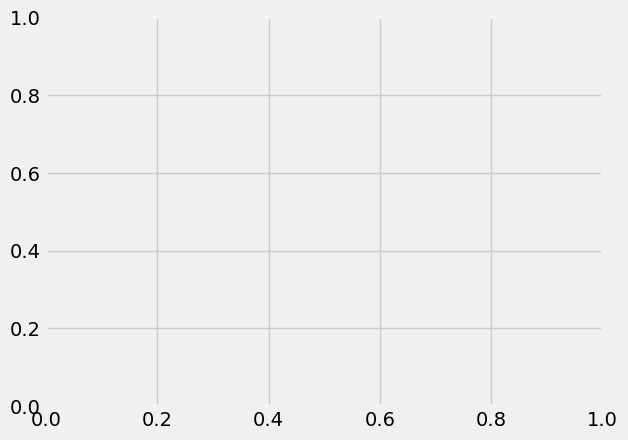

In [129]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

# Perform a query to retrieve the data and precipitation scores
months = session.query(measurement.date).\
    filter(measurement.date > '2016-08-23').order_by(measurement.date).all()

months_percep = session.query(measurement.prcp).\
    filter(measurement.date > '2016-08-23').order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data = pd.DataFrame({
    "Date" : months,
    "Percipitation": months_percep
})

# Sort the dataframe by date
prcp_data = prcp_data.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prcp_data["Percipitation"], prcp_data["Date"])

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

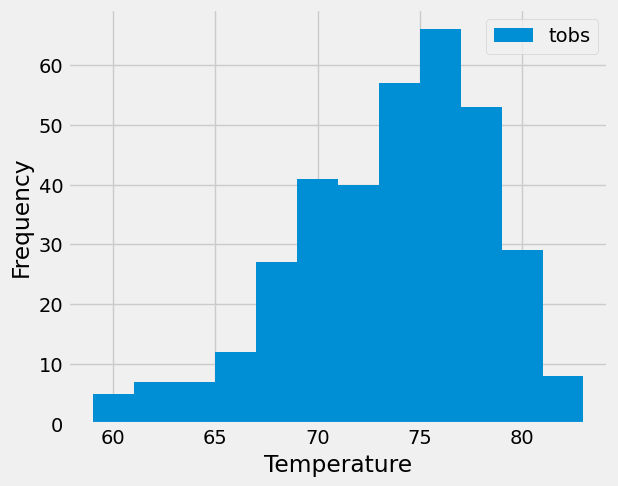

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()